In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from tmpnn import Regression

data: https://archive.ics.uci.edu/dataset/243/yacht+hydrodynamics

In [57]:
data = np.loadtxt("yacht_hydrodynamics.data", delimiter=' ')
_min = data.min(0)
_ptp = data.ptp(0)
data = (data - _min)/_ptp - 0.5


X, Y = data[:, :-1], data[:, -1].reshape(-1,1)

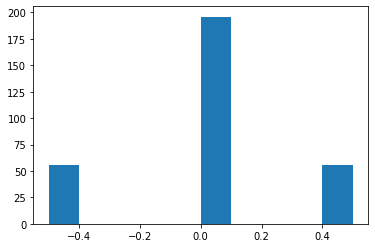

In [81]:
plt.hist(X[:,0])
plt.show()

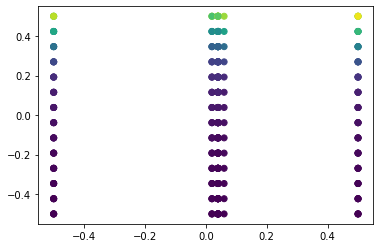

In [101]:
plt.scatter(X[:,0], X[:,5], c=Y)

In [82]:
# test = (Y>=0.2).ravel()
test = (X[:,0] >= 0.2).ravel()
X_train, X_test = X[~test], X[test]
Y_train, Y_test = Y[~test], Y[test]

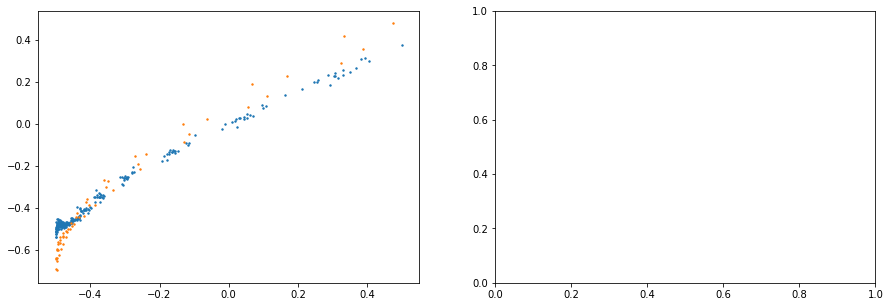

In [110]:
poly_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                            ('preprocessor', PolynomialFeatures(degree=3, include_bias=False)),
                            # ('estimator', LinearRegression(normalize=True))
                            ('estimator', Ridge(alpha=0.1, normalize=True))
                            # ('estimator', SVR(kernel='poly', degree=4))
                           ])

poly_pipe.fit(X_train, Y_train)
Y_pred = poly_pipe.predict(X_train)
Y_test_pred = poly_pipe.predict(X_test)

_, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].scatter(Y_train, Y_pred, s=2)
axs[0].scatter(Y_test, Y_test_pred, s=2)


In [112]:
# model = Regression(num_features=X.shape[1], num_targets=Y.shape[1], order=2, steps=20, is_scale=False)
# model.fit(X_train, Y_train, epochs=1000, verbose=2)
# model.set_learning_rate(1e-4)
# model.fit(X_train, Y_train, epochs=200, verbose=2)
# model.set_learning_rate(1e-5)
# model.fit(X_train, Y_train, epochs=200, verbose=2)
model.set_learning_rate(1e-5)
model.fit(X_train, Y_train, epochs=5000, verbose=2)

Ytm_pred = model.predict(X_train)
Ytm_test_pred = model.predict(X_test)

Epoch 1/5000
1/1 - 0s - loss: 1.2147e-05
Epoch 2/5000
1/1 - 0s - loss: 1.2211e-05
Epoch 3/5000
1/1 - 0s - loss: 1.2397e-05
Epoch 4/5000
1/1 - 0s - loss: 1.2390e-05
Epoch 5/5000
1/1 - 0s - loss: 1.2209e-05
Epoch 6/5000
1/1 - 0s - loss: 1.2193e-05
Epoch 7/5000
1/1 - 0s - loss: 1.2289e-05
Epoch 8/5000
1/1 - 0s - loss: 1.2230e-05
Epoch 9/5000
1/1 - 0s - loss: 1.2167e-05
Epoch 10/5000
1/1 - 0s - loss: 1.2174e-05
Epoch 11/5000
1/1 - 0s - loss: 1.2173e-05
Epoch 12/5000
1/1 - 0s - loss: 1.2165e-05
Epoch 13/5000
1/1 - 0s - loss: 1.2180e-05
Epoch 14/5000
1/1 - 0s - loss: 1.2183e-05
Epoch 15/5000
1/1 - 0s - loss: 1.2151e-05
Epoch 16/5000
1/1 - 0s - loss: 1.2126e-05
Epoch 17/5000
1/1 - 0s - loss: 1.2136e-05
Epoch 18/5000
1/1 - 0s - loss: 1.2152e-05
Epoch 19/5000
1/1 - 0s - loss: 1.2150e-05
Epoch 20/5000
1/1 - 0s - loss: 1.2138e-05
Epoch 21/5000
1/1 - 0s - loss: 1.2133e-05
Epoch 22/5000
1/1 - 0s - loss: 1.2131e-05
Epoch 23/5000
1/1 - 0s - loss: 1.2125e-05
Epoch 24/5000
1/1 - 0s - loss: 1.2122e-05
E

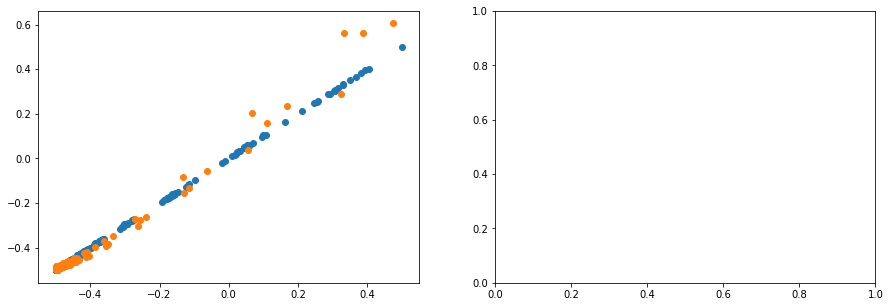

In [113]:
_, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].scatter(Y_train, Ytm_pred)
axs[0].scatter(Y_test, Ytm_test_pred)